In [2]:
path='/content/drive/MyDrive/Colab Notebooks/Dacon/2021금용/woori/'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 한글폰트 사용 in colab

%matplotlib inline  

import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import plotly
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold, RandomizedSearchCV,  GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import make_scorer, fbeta_score,matthews_corrcoef
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

import imblearn

# make a prediction with a stacking ensemble
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [7]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

!ls  ## Check if required cuda 9.0 amd64-deb file is downloaded
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0

--2021-08-26 23:19:31--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2021-08-26 23:19:31--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?VJjBvHg1AEhkQPxkRpheZbeFRtHf0PuwCifHAp4SEdTTPTV8mK14vAuys3W7CjnmxEsrG5pl7jlKIrG-Wm0Ao-foD4kjYhnuG

In [5]:
!pip install vecstack
!pip install thundersvm
!pip install mlxtend

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=71b7d7036208e5a6b102e292c4028960734465a4c1c4df2871a12d43bc06f448
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack
     |████████████████████████████████| 507 kB 7.7 MB/s 


In [8]:
import xgboost

from xgboost import XGBClassifier
from xgboost import plot_importance

from thundersvm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from vecstack import stacking

In [18]:
import plotly.offline as py
import plotly.graph_objs as go

In [9]:
df=pd.read_csv(path+'우리은행 데이터경진대회 데이터셋.csv')
df=df.drop(['Unnamed: 0'], axis=1)

In [178]:
details=pd.read_csv(path+'details.csv')

In [11]:
details[details['No.']==62]

,No.,정보원천,자료형태,정보영역,컬럼명,항목명(국문),항목 설명,최소값(정수),최대값(정수),데이터 제공 형태,비고 (데이터 출처)
64,62.0,내부정보,범주형,재무정보,J_BRWM_DPIN_RT_RE,차입금 의존도 비율,총 자본 중 외부에서 조달한 차입금이 차지하는 비중을 범주화,1.0,4.0,범주화,법인 관련 변수


In [12]:
details[['컬럼명',	'항목명(국문)']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
컬럼명,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,J_TOT_DPS_6M_AVBL_AM_RE,J_CORE_DPS_1M_AVBL_AM_RE,J_CORE_DPS_6M_AVBL_AM_RE,J_TOT_DPS_ACC_CNT_RE,J_NRML_DPS_ACC_CNT_RE,J_TOT_SAVING_ACC_CNT_RE,J_NRML_SAVING_ACC_CNT_RE,J_TOT_TS_1M_CNT_RE,J_TOT_TS_6M_CNT_RE,J_TOT_TS_1M_AM_RE,J_TOT_TS_6M_AM_RE,J_OB_TS_1M_CNT_RE,J_OB_TS_6M_CNT_RE,J_OB_TS_1M_AM_RE,J_OB_TS_6M_AM_RE,J_IB_TS_1M_CNT_RE,J_IB_TS_6M_CNT_RE,J_IB_TS_1M_AM_RE,J_IB_TS_6M_AM_RE,J_TOT_TS_3M_AVG_CNT_RE,J_TOT_TS_6M_AVG_CNT_RE,J_TOT_TS_3M_AVG_AM_RE,J_TOT_TS_6M_AVG_AM_RE,J_OB_TS_3M_AVG_CNT_RE,J_OB_TS_6M_AVG_CNT_RE,J_OB_TS_3M_AVG_AM_RE,J_OB_TS_6M_AVG_AM_RE,J_IB_TS_3M_AVG_CNT_RE,J_IB_TS_6M_AVG_CNT_RE,J_IB_TS_3M_AVG_AM_RE,...,J_FNC_COST_AM_RE,J_CTM_NPFT_AM_RE,J_BZ_AFACT_CSFL_AM_RE,J_PFPC_CPMT_AF_CSFL_AM_RE,J_EBIT_VAL_NV_RT_RE,J_EBITDA_VAL_NV_RT_RE,J_LBLT_RT_RE,J_FNC_COST_CMP_SALEM_RT_RE,J_BRWM_DPIN_RT_RE,J_STM_BRWM_DPIN_RT_RE,J_SALEM_BZ_PFT_RT_RE,P_PRIMARY_CUSTOM_FLG_RE,P_ACT_CUSTOM_FLG_RE,P_TOT_LON_FLG_RE,P_INBK_JNNG_FLG_RE,P_SMPB_JNNG_FLG_RE,P_TOT_DPS_1M_AVBL_AM_RE,P_TOT_DPS_6M_AVBL_AM_RE,P_CORE_DPS_1M_AVBL_AM_RE,P_CORE_DPS_6M_AVBL_AM_RE,P_TOT_DPS_ACC_CNT_RE,P_NRML_DPS_ACC_CNT_RE,P_NRML_SAVING_ACC_CNT_RE,P_TOT_SAVING_ACC_CNT_RE,P_MAX_TRN_1M_AM_RE,P_MAX_TRN_6M_AM_RE,P_AVG_TRN_1M_AM_RE,P_AVG_TRN_6M_AM_RE,P_SUM_TRN_1M_AM_RE,P_SUM_TRN_6M_AM_RE,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
항목명(국문),6개월 내 여신 유치 여부,최근 3개월 제1금융권 여신거래 기관 수,최근 6개월 타행(제1금융권) 여신 금액 평균,최근 3개월간 전체 타행(제1금융권) 여신 금액 최대값,"현재 보유 신용보증기금, 기술보증기금 여신 금액",여신 계좌 수,여신 금액,여신 금액 최대값,수신 금액,최근 1개월 전체 수신 평잔,최근 6개월 전체 수신 평잔,최근 1개월 자유 입출식 평잔,최근 6개월 자유 입출식 평잔,수신 계좌 수,정상 수신 계좌 수,"전체 적금, 예금 상품 계좌 수(A)","정상 적금, 예금 상품 계좌 수(B)",최근 1개월 이체 횟수,최근 6개월 이체 횟수,최근 1개월 이체 금액,최근 6개월 이체 금액,최근 1개월 타행 이체 횟수,최근 6개월 타행 이체 횟수,최근 1개월 타행 이체 금액,최근 6개월 타행 이체 금액,최근 1개월 인터넷 뱅킹 이체 횟수,최근 6개월 인터넷 뱅킹 이체 횟수,최근 1개월 인터넷 뱅킹 이체 금액,최근 6개월 인터넷 뱅킹 이체금액,최근 3개월 평균 이체 횟수,최근 6개월 평균 이체 횟수,최근 3개월 평균 이체 금액,최근 6개월 평균 이체 금액,최근 3개월 평균 타행 이체 횟수,최근 6개월 평균 타행 이체 횟수,최근 3개월 평균 타행 이체 금액,최근 6개월 평균 타행 이체 금액,최근 3개월 평균 인터넷뱅킹 이체 횟수,최근 6개월 평균 인터넷뱅킹 이체 횟수,최근 3개월 평균 인터넷뱅킹 이체 금액,...,금융 비용 금액,당기 순이익 금액,영업 활동 후 현금 흐름 금액,순자금 조달 비용 지급 후 현금 흐름 금액,EBIT값 수치,EBITDA값 수치,부채 비율,금융 비용 대비 매출액 비율,차입금 의존도 비율,단기차입금 의존도 비율,매출액 영업 이익율,주거래고객 여부,활동고객 여부,여신보유 경험여부,인터넷뱅킹 가입여부,스마트뱅킹 가입여부,최근 1개월 전체 수신 평잔,최근 6개월 전체 수신 평잔,최근 1개월 자유 입출식 평잔,최근 6개월 자유 입출식 평잔,수신 계좌 수 (A),정상 수신 계좌 수 (B),정상 적금/예금 상품 계좌 수,전체 적립/예금 계좌 수,최근 1개월 이내 최대 입금 금액,최근 6개월 이내 최대 입금 금액,최근 1개월 이내 평균 입금 금액,최근 6개월 이내 평균 입금 금액,최근 1개월 이내 전체 입금 금액,최근 6개월 이내 전체 입금 금액,최근 1개월 영업점 방문 횟수,최근 6개월 영업점 방문 횟수,최근 6개월 ATM 이용 횟수,최근 6개월 인터넷 뱅킹 로그인 횟수,여신 계좌 수,여신 금액,최근 6개월 이체 횟수,최근 6개월 이체 금액,최근 6개월 타행 이체 횟수,최근 6개월 타행 이체 금액


In [36]:
type(details['항목명(국문)'].T[1:])

pandas.core.series.Series

In [ ]:
details[details['No.']==55]

,No.,정보원천,자료형태,정보영역,컬럼명,항목명(국문),항목 설명,최소값(정수),최대값(정수),데이터 제공 형태,비고 (데이터 출처)
57,55.0,내부정보,범주형,재무정보,J_CTM_NPFT_AM_RE,당기 순이익 금액,수익 - (비용+소득세)를 범주화,1.0,4.0,범주화,법인 관련 변수


In [7]:
df

,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,J_TOT_DPS_6M_AVBL_AM_RE,J_CORE_DPS_1M_AVBL_AM_RE,J_CORE_DPS_6M_AVBL_AM_RE,J_TOT_DPS_ACC_CNT_RE,J_NRML_DPS_ACC_CNT_RE,J_TOT_SAVING_ACC_CNT_RE,J_NRML_SAVING_ACC_CNT_RE,J_TOT_TS_1M_CNT_RE,J_TOT_TS_6M_CNT_RE,J_TOT_TS_1M_AM_RE,J_TOT_TS_6M_AM_RE,J_OB_TS_1M_CNT_RE,J_OB_TS_6M_CNT_RE,J_OB_TS_1M_AM_RE,J_OB_TS_6M_AM_RE,J_IB_TS_1M_CNT_RE,J_IB_TS_6M_CNT_RE,J_IB_TS_1M_AM_RE,J_IB_TS_6M_AM_RE,J_TOT_TS_3M_AVG_CNT_RE,J_TOT_TS_6M_AVG_CNT_RE,J_TOT_TS_3M_AVG_AM_RE,J_TOT_TS_6M_AVG_AM_RE,J_OB_TS_3M_AVG_CNT_RE,J_OB_TS_6M_AVG_CNT_RE,J_OB_TS_3M_AVG_AM_RE,J_OB_TS_6M_AVG_AM_RE,J_IB_TS_3M_AVG_CNT_RE,J_IB_TS_6M_AVG_CNT_RE,J_IB_TS_3M_AVG_AM_RE,...,J_FNC_COST_AM_RE,J_CTM_NPFT_AM_RE,J_BZ_AFACT_CSFL_AM_RE,J_PFPC_CPMT_AF_CSFL_AM_RE,J_EBIT_VAL_NV_RT_RE,J_EBITDA_VAL_NV_RT_RE,J_LBLT_RT_RE,J_FNC_COST_CMP_SALEM_RT_RE,J_BRWM_DPIN_RT_RE,J_STM_BRWM_DPIN_RT_RE,J_SALEM_BZ_PFT_RT_RE,P_PRIMARY_CUSTOM_FLG_RE,P_ACT_CUSTOM_FLG_RE,P_TOT_LON_FLG_RE,P_INBK_JNNG_FLG_RE,P_SMPB_JNNG_FLG_RE,P_TOT_DPS_1M_AVBL_AM_RE,P_TOT_DPS_6M_AVBL_AM_RE,P_CORE_DPS_1M_AVBL_AM_RE,P_CORE_DPS_6M_AVBL_AM_RE,P_TOT_DPS_ACC_CNT_RE,P_NRML_DPS_ACC_CNT_RE,P_NRML_SAVING_ACC_CNT_RE,P_TOT_SAVING_ACC_CNT_RE,P_MAX_TRN_1M_AM_RE,P_MAX_TRN_6M_AM_RE,P_AVG_TRN_1M_AM_RE,P_AVG_TRN_6M_AM_RE,P_SUM_TRN_1M_AM_RE,P_SUM_TRN_6M_AM_RE,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
0,0,2,3,4,1,2,3,3,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,2,1,1,3,3,2,3,3,3,2,1,2,1,1,1,4,3,3,4,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,1,2,3,1,1,1,1,3,3,3,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,4,1,1,2,3,4,2,3,3,1,1,2,1,1,1,4,3,3,4,2,1,1,2,3,2,3,4,3,3,1,3,3,1,1,1,3,3,3,3
2,0,2,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,4,1,1,4,3,2,2,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,3,3,4,1,4,4,4,1,1,1,1,1,3,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,4,2,2,4,3,4,3,4,3,3,2,2,2,2,1,4,3,3,4,3,3,3,3,3,3,3,4,3,3,3,3,3,1,3,3,1,1,1,1
4,0,3,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,4,3,1,1,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119530,0,2,2,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,3,1,1,3,2,4,2,4,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
119531,0,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,3,3,2,2,1,1,1,2,3,3,2,2,3,3,2,2,2,2,1,2,3,3,2,...,2,2,1,1,2,1,4,1,3,2,2,2,2,2,2,2,2,2,2,3,1,2,1,1,3,2,2,3,3,2,1,2,1,2,2,3,3,3,3,3
119532,0,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,2,1,1,2,2,4,2,4,3,3,1,1,1,2,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
119533,0,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,3,4,1,1,4,3,1,1,2,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
df['TARGET'].value_counts()

0    118720
1       815
Name: TARGET, dtype: int64

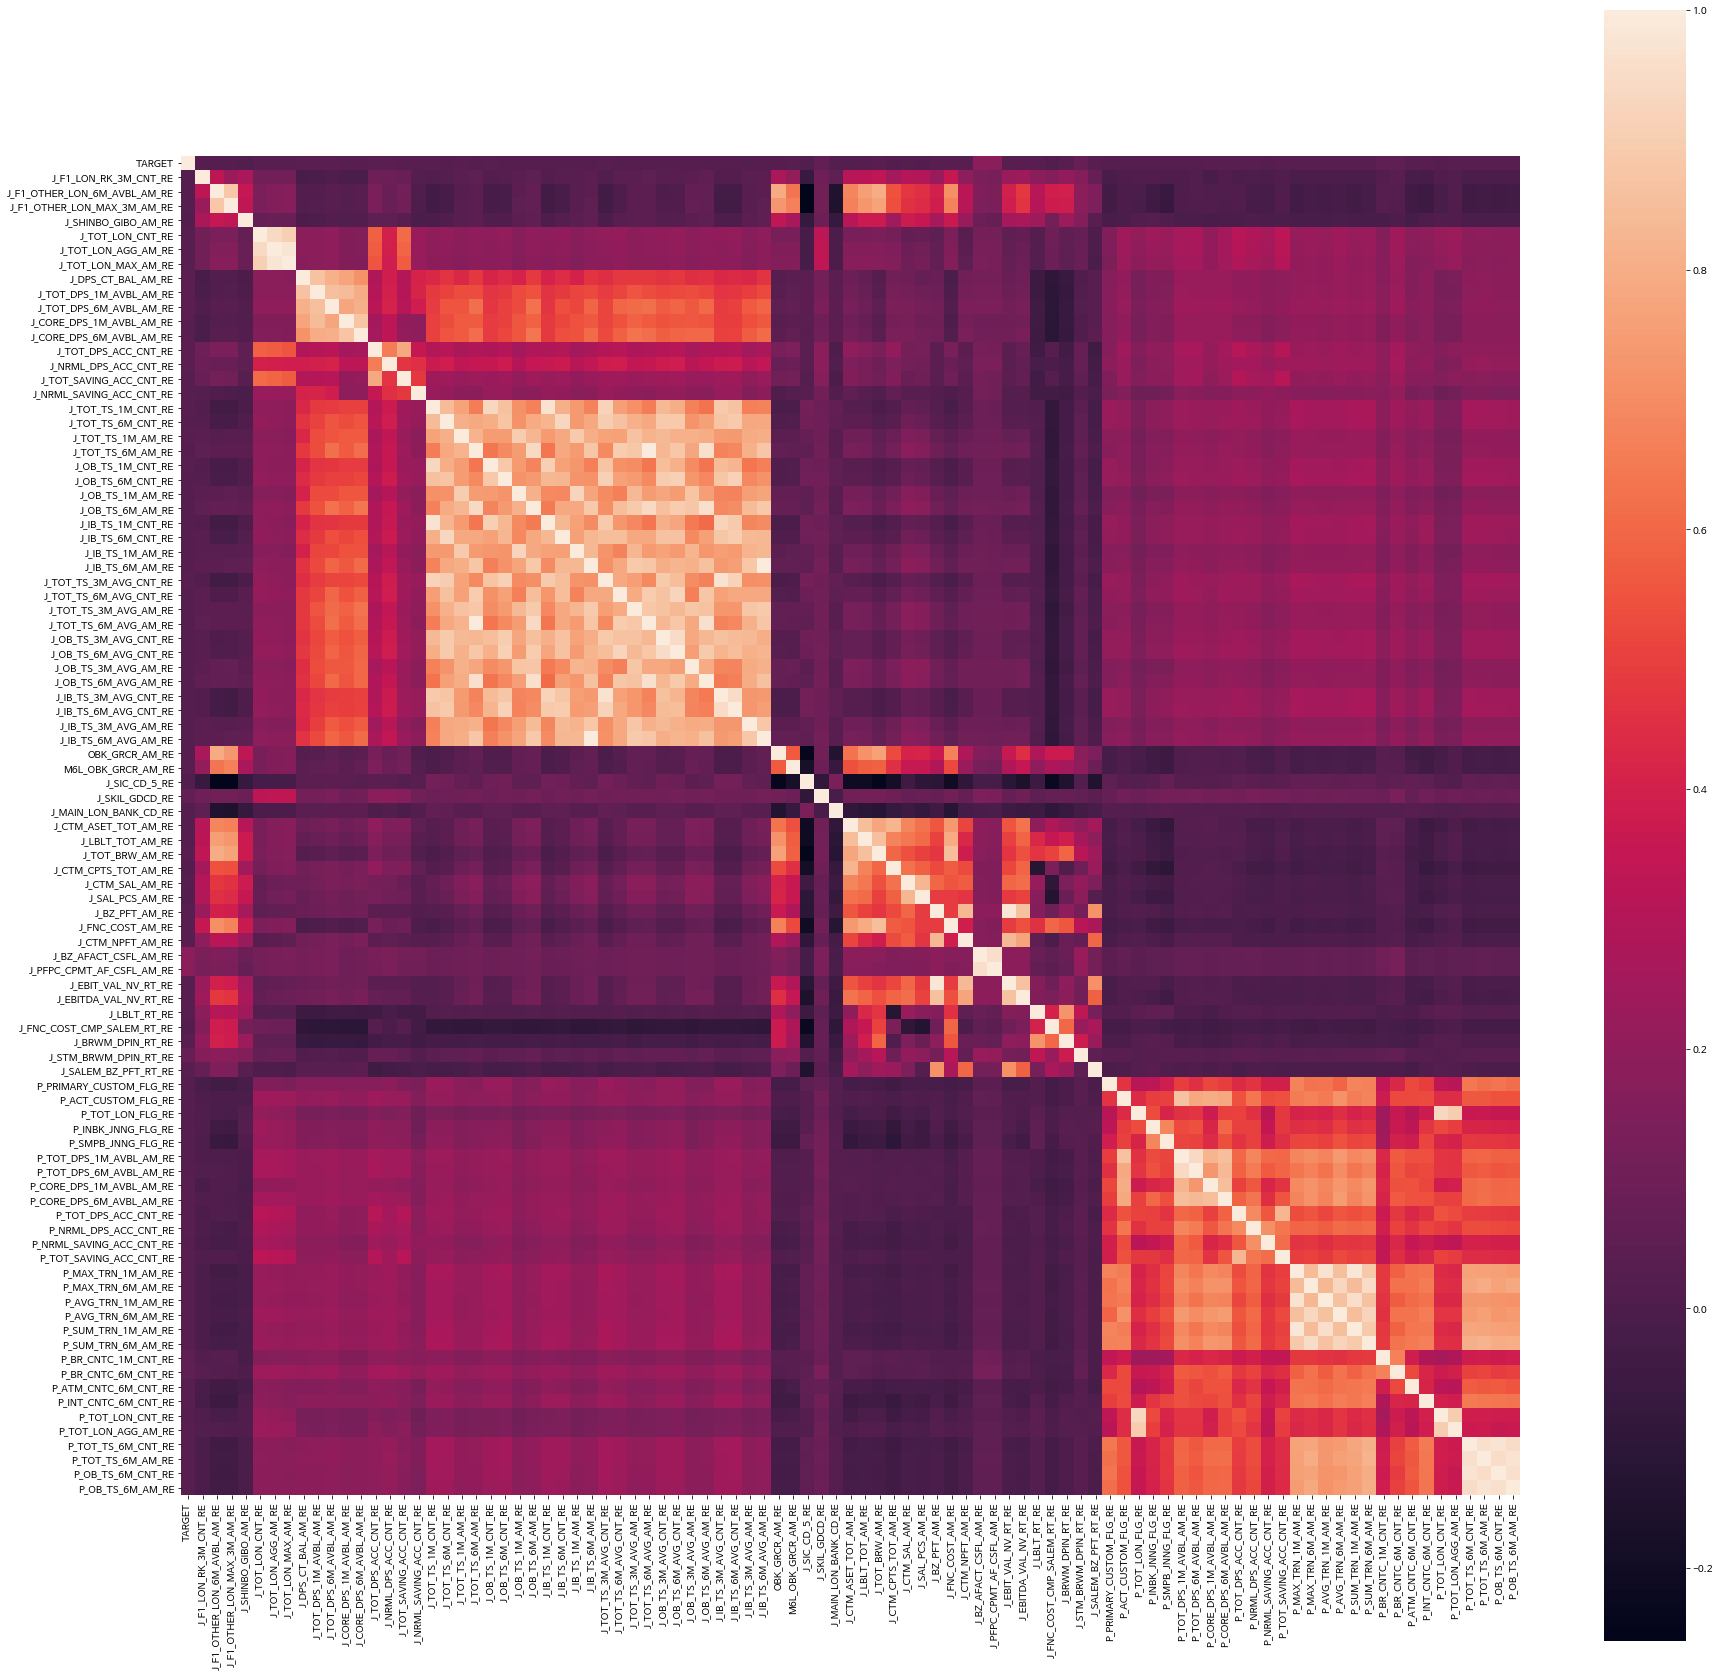

In [11]:
corrmat = df.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, square=True)

c = corrmat.abs()

s = c.unstack()
so = s.sort_values(ascending=True).drop_duplicates()

# Split Train/Test data

In [106]:
X=df.iloc[:,1:]
y=df['TARGET']

# One hot Encoding

In [107]:
# converting type of columns to 'category'

from sklearn.preprocessing import OneHotEncoder


# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

onehot_cat = ['J_SIC_CD_5_RE','J_SKIL_GDCD_RE', 'J_MAIN_LON_BANK_CD_RE'	]

X = pd.get_dummies(X, columns = onehot_cat)

# data_cat = data_cat.drop('time')
X

,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,J_TOT_DPS_6M_AVBL_AM_RE,J_CORE_DPS_1M_AVBL_AM_RE,J_CORE_DPS_6M_AVBL_AM_RE,J_TOT_DPS_ACC_CNT_RE,J_NRML_DPS_ACC_CNT_RE,J_TOT_SAVING_ACC_CNT_RE,J_NRML_SAVING_ACC_CNT_RE,J_TOT_TS_1M_CNT_RE,J_TOT_TS_6M_CNT_RE,J_TOT_TS_1M_AM_RE,J_TOT_TS_6M_AM_RE,J_OB_TS_1M_CNT_RE,J_OB_TS_6M_CNT_RE,J_OB_TS_1M_AM_RE,J_OB_TS_6M_AM_RE,J_IB_TS_1M_CNT_RE,J_IB_TS_6M_CNT_RE,J_IB_TS_1M_AM_RE,J_IB_TS_6M_AM_RE,J_TOT_TS_3M_AVG_CNT_RE,J_TOT_TS_6M_AVG_CNT_RE,J_TOT_TS_3M_AVG_AM_RE,J_TOT_TS_6M_AVG_AM_RE,J_OB_TS_3M_AVG_CNT_RE,J_OB_TS_6M_AVG_CNT_RE,J_OB_TS_3M_AVG_AM_RE,J_OB_TS_6M_AVG_AM_RE,J_IB_TS_3M_AVG_CNT_RE,J_IB_TS_6M_AVG_CNT_RE,J_IB_TS_3M_AVG_AM_RE,J_IB_TS_6M_AVG_AM_RE,...,J_LBLT_RT_RE,J_FNC_COST_CMP_SALEM_RT_RE,J_BRWM_DPIN_RT_RE,J_STM_BRWM_DPIN_RT_RE,J_SALEM_BZ_PFT_RT_RE,P_PRIMARY_CUSTOM_FLG_RE,P_ACT_CUSTOM_FLG_RE,P_TOT_LON_FLG_RE,P_INBK_JNNG_FLG_RE,P_SMPB_JNNG_FLG_RE,P_TOT_DPS_1M_AVBL_AM_RE,P_TOT_DPS_6M_AVBL_AM_RE,P_CORE_DPS_1M_AVBL_AM_RE,P_CORE_DPS_6M_AVBL_AM_RE,P_TOT_DPS_ACC_CNT_RE,P_NRML_DPS_ACC_CNT_RE,P_NRML_SAVING_ACC_CNT_RE,P_TOT_SAVING_ACC_CNT_RE,P_MAX_TRN_1M_AM_RE,P_MAX_TRN_6M_AM_RE,P_AVG_TRN_1M_AM_RE,P_AVG_TRN_6M_AM_RE,P_SUM_TRN_1M_AM_RE,P_SUM_TRN_6M_AM_RE,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE,J_SIC_CD_5_RE_1,J_SIC_CD_5_RE_2,J_SKIL_GDCD_RE_1,J_SKIL_GDCD_RE_2,J_MAIN_LON_BANK_CD_RE_1,J_MAIN_LON_BANK_CD_RE_2
0,2,3,4,1,2,3,3,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,3,3,3,2,1,2,1,1,1,4,3,3,4,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1
1,1,2,3,1,1,1,1,3,3,3,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,2,3,3,1,1,2,1,1,1,4,3,3,4,2,1,1,2,3,2,3,4,3,3,1,3,3,1,1,1,3,3,3,3,0,1,1,0,0,1
2,2,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0
3,3,3,4,1,4,4,4,1,1,1,1,1,3,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,3,4,3,3,2,2,2,2,1,4,3,3,4,3,3,3,3,3,3,3,4,3,3,3,3,3,1,3,3,1,1,1,1,0,1,1,0,1,0
4,3,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119530,2,2,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,2,4,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0
119531,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,3,3,2,2,1,1,1,2,3,3,2,2,3,3,2,2,2,2,1,2,3,3,2,2,...,4,1,3,2,2,2,2,2,2,2,2,2,2,3,1,2,1,1,3,2,2,3,3,2,1,2,1,2,2,3,3,3,3,3,0,1,1,0,1,0
119532,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,4,2,4,3,3,1,1,1,2,2,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1
119533,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,2,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1


In [108]:
SEED =42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
X_train = pd.DataFrame(data=X_train,columns=X.columns )
y_train= pd.DataFrame(data=y_train,columns=['TARGET'])

In [109]:
print("length of  data is ",len(X_train))
print("Number of no loan in data",len(y_train[y_train['TARGET']==0]))
print("Number of loans",len(y_train[y_train['TARGET']==1]))

length of  data is  83674
Number of no loan in data 83092
Number of loans 582


# Normalization

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Variance explained by the principal components(in decreasing order):  [0.28651827 0.142928   0.11083945 0.04121882 0.03452033 0.02692469
 0.02465962 0.02246371 0.01975424 0.01784545 0.01616833 0.01502002
 0.01263458 0.01178484 0.01093906 0.01087571 0.01025431 0.00912159
 0.00890219 0.0085756  0.00822641 0.00801302 0.00785293 0.00744706
 0.00679791 0.00650444 0.0060595  0.00553452 0.00535296]
Shape of transformed X:  (119535, 29)


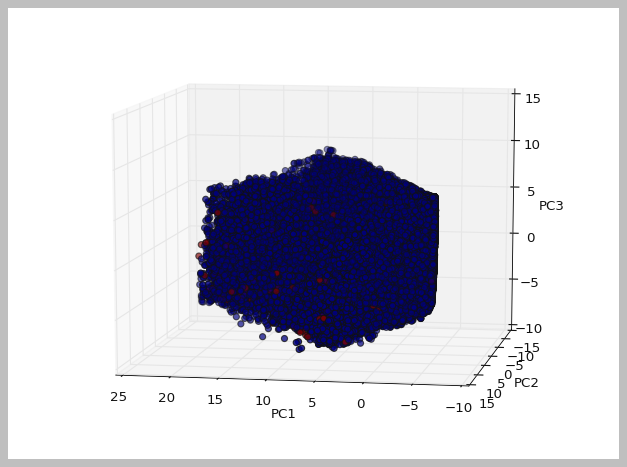

In [72]:
#Standardizing the features
X= StandardScaler().fit_transform(X)
# Fit PCA and transform X.
pca=PCA(n_components=.90)
pca.fit(X)
print('Variance explained by the principal components(in decreasing order): ',pca.explained_variance_ratio_)
#print('PCA singular values: ',pca.singular_values_)
X1=pca.transform(X)
print('Shape of transformed X: ',X1.shape)

from mpl_toolkits.mplot3d import Axes3D
plt.style.use('classic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0],X1[:,1], X1[:,2], c=df['TARGET'], s=30)
ax.view_init(10, 100)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



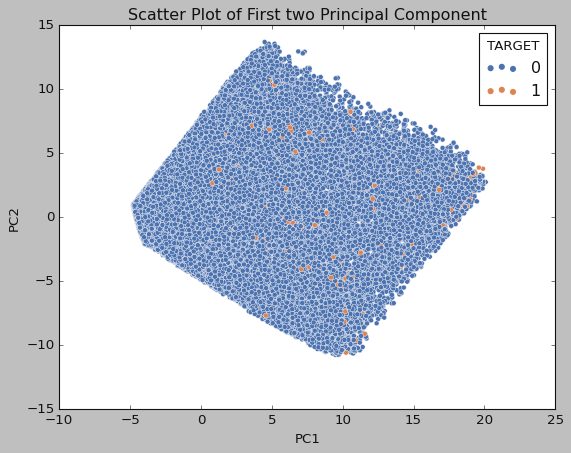

In [73]:
plt.figure()
sns.scatterplot(X1[:,0],X1[:,1], hue=y, palette='deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First two Principal Component')
plt.show()

# Cross Validation 

In [112]:
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
 #   basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
 #   basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
 #   basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
 #   basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
#    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
#    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100, class_weight={0:1,1:150})))
    basedModels.append(('RF_Ent200'   , RandomForestClassifier(criterion='entropy',n_estimators=200, class_weight={0:1,1:150})))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100, class_weight={0:1,1:150})))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
#    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
#    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', XGBClassifier(n_estimators= 2000, tree_method = "gpu_hist", scale_pos_weight=150)))
    basedModels.append(('XGB_500', XGBClassifier(n_estimators= 500, tree_method = "gpu_hist", scale_pos_weight=150)))
    basedModels.append(('XGB_100', XGBClassifier(n_estimators= 100, tree_method = "gpu_hist", scale_pos_weight=150)))
    basedModels.append(('XGB_1000', XGBClassifier(n_estimators= 1000, tree_method = "gpu_hist", scale_pos_weight=150)))
#    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))

    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'f1'
    seed = SEED
    results = []
    names = []
    for name, model in models:
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
        cv_results = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)   
        
    return results,msg

In [113]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.002057 (0.008143)
LDA: 0.163262 (0.032129)
CART: 0.507872 (0.056879)
NB: 0.035242 (0.004274)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



SVM RBF: 0.438347 (0.060708)
AB: 0.001926 (0.007623)
RF_Ent100: 0.530859 (0.049681)
RF_Ent200: 0.537874 (0.048295)
RF_Gini100: 0.523726 (0.062169)
ET100: 0.643554 (0.051722)
MLP: 0.531520 (0.061883)
XGB_2000: 0.413582 (0.025913)
XGB_500: 0.174556 (0.012519)
XGB_100: 0.101916 (0.005342)
XGB_1000: 0.261181 (0.017682)


# Model Bulding

In [111]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100 ,class_weight={0:1,1:150})
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

#knn = KNeighborsClassifier(9)
#knn.fit(X_train,y_train)
#y_pred_knn = knn.predict(X_test)

et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

xgb = XGBClassifier(n_estimators= 2000,  tree_method = "gpu_hist", scale_pos_weight=150)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

svc = SVC(C=100, kernel='rbf', probability = True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#svc = SVC(kernel='linear',gamma='auto',probability=True)
#svc.fit(X_train,y_train)
#y_pred_svc = svc.predict(X_test)

#sgd = SGDClassifier(max_iter=1000, tol=1e-4)
#sgd.fit(X_train,y_train)
#y_pred_sgd = sgd.predict(X_test)

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:2

# First Stacked Model

In [112]:
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100,class_weight={0:1,1:150}),
    MLPClassifier(),
    SVC(C=100, kernel='rbf'),
    RandomForestClassifier(criterion='gini',n_estimators=100,class_weight={0:1,1:150}),
#    ExtraTreesClassifier(n_estimators= 500,class_weight={0:1,1:150}),
    ExtraTreesClassifier(n_estimators= 100,class_weight={0:1,1:150}),
#    XGBClassifier(n_estimators= 1000,  tree_method = "gpu_hist", scale_pos_weight=150),
#    XGBClassifier(n_estimators= 100,  tree_method = "gpu_hist", scale_pos_weight=150),
#    XGBClassifier(n_estimators= 500,  tree_method = "gpu_hist", scale_pos_weight=150),
    XGBClassifier(n_estimators= 2000,  tree_method = "gpu_hist", scale_pos_weight=150),
#    XGBClassifier(tree_method = "gpu_hist", scale_pos_weight=150),
#    SGDClassifier(max_iter=1000, tol=1e-4),
    
#    AdaBoostClassifier(),
    DecisionTreeClassifier(class_weight={0:1,1:150}),
    LinearDiscriminantAnalysis(),
#    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
#    ExtraTreesClassifier(n_estimators= 1000),
]




In [113]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [8]

model  0:     [RandomForestClassifier]
    fold  0:  [0.99468180]
    fold  1:  [0.99450254]
    fold  2:  [0.99480131]
    fold  3:  [0.99438303]
    fold  4:  [0.99521931]
    ----
    MEAN:     [0.99471760] + [0.00028920]
    FULL:     [0.99471759]

model  1:     [MLPClassifier]
    fold  0:  [0.99396474]
    fold  1:  [0.99468180]
    fold  2:  [0.99492082]
    fold  3:  [0.99360621]
    fold  4:  [0.99462173]
    ----
    MEAN:     [0.99435906] + [0.00049214]
    FULL:     [0.99435906]

model  2:     [SVC]
    fold  0:  [0.99450254]
    fold  1:  [0.99498058]
    fold  2:  [0.99617568]
    fold  3:  [0.99521960]
    fold  4:  [0.99575714]
    ----
    MEAN:     [0.99532711] + [0.00058593]
    FULL:     [0.99532710]

model  3:     [RandomForestClassifier]
    fold  0:  [0.99456229]
    fold  1:  [0.99444278]
    fold  2:  [0.99474156]
    fold  3:  [0.9942

In [114]:
# initializing generalizer model i.e., MLP classifier in our case
model = RandomForestClassifier()
    
model = model.fit(S_train, y_train)
y_pred_stack1 = model.predict(S_test)
y_pred_proba_stack1 = model.predict_proba(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred_stack1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Final prediction score: [0.99640278]


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier1,0.996403,0.825,0.566524,0.999214,0.671756,0.782869,0.124244,0.682007


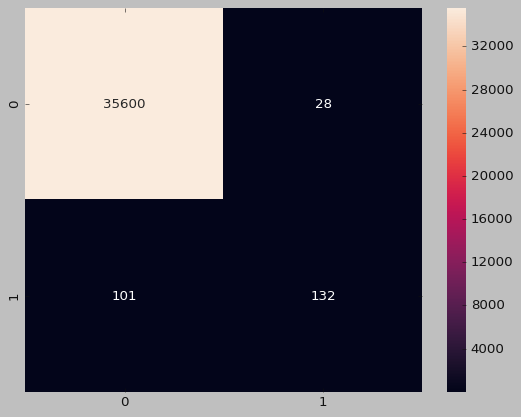

In [115]:
CM=confusion_matrix(y_test,y_pred_stack1, )
sns.heatmap(CM, annot=True, fmt='d')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_stack1)
acc= accuracy_score(y_test, y_pred_stack1)
roc=roc_auc_score(y_test, y_pred_stack1)
prec = precision_score(y_test, y_pred_stack1)
rec = recall_score(y_test, y_pred_stack1)
f1 = f1_score(y_test, y_pred_stack1)

mathew = matthews_corrcoef(y_test, y_pred_stack1)
model_results =pd.DataFrame([['STacked Classifier1',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

# Second Stacked Model

In [116]:
classifiers = [
               #('svc', svc),
               ('mlp', mlp),                             
               ('xgb', xgb),
               ('decc', decc),
               ('et500', et_500),
               ('rfc', rf_ent)]

In [117]:
clf = StackingClassifier(estimators=classifiers, 
                         final_estimator=LogisticRegression(),
                         stack_method='auto',
                         cv = 5,
                         n_jobs=-1,
                         passthrough=False)

In [118]:
clf.fit(X_train,y_train)
y_pred_stack2 = clf.predict(X_test)
y_pred_proba_stack2 = clf.predict_proba(X_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred_stack2))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Final prediction score: [0.99670952]


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier1,0.996403,0.825000,0.566524,0.999214,0.671756,0.782869,0.124244,0.682007
1,STacked Classifier2,0.996710,0.810811,0.643777,0.999018,0.717703,0.821397,0.113650,0.720895


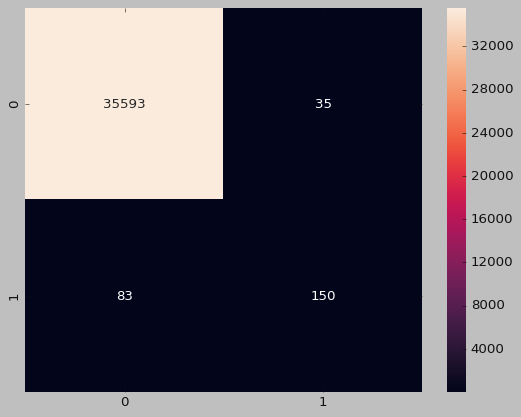

In [119]:
CM=confusion_matrix(y_test,y_pred_stack2, )
sns.heatmap(CM, annot=True, fmt='d')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_stack2)
acc= accuracy_score(y_test, y_pred_stack2)
roc=roc_auc_score(y_test, y_pred_stack2)
prec = precision_score(y_test, y_pred_stack2)
rec = recall_score(y_test, y_pred_stack2)
f1 = f1_score(y_test, y_pred_stack2)

mathew = matthews_corrcoef(y_test, y_pred_stack2)

results =pd.DataFrame([['STacked Classifier2',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
model_results = model_results.append(results, ignore_index = True)
model_results

In [120]:
data = {'Random Forest': y_pred_rfe, 
                'MLP': y_pred_mlp, 
                #'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et500,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
#                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning:

invalid value encountered in multiply



,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier1,0.996403,0.825000,0.566524,0.999214,0.671756,0.782869,0.124244,0.682007
1,STacked Classifier2,0.996710,0.810811,0.643777,0.999018,0.717703,0.821397,0.113650,0.720895
2,Random Forest,0.995901,0.794521,0.497854,0.999158,0.612137,0.748506,0.141581,0.627103
3,MLP,0.995036,0.642487,0.532189,0.998063,0.582160,0.765126,0.171439,0.582288
4,EXtra tree classifier,0.996486,0.874126,0.536481,0.999495,0.664894,0.767988,0.121355,0.683293
5,XGB,0.983074,0.255236,0.836910,0.984029,0.391174,0.910470,0.584632,0.456776
6,SVC,0.996235,0.835616,0.523605,0.999326,0.643799,0.761466,NaN,0.659807
7,Adaboost,0.993363,0.000000,0.000000,0.999860,0.000000,0.499930,0.229225,-0.000955
8,CART,0.992108,0.420886,0.570815,0.994864,0.484517,0.782840,0.272570,0.486308
9,GBM,0.993503,0.500000,0.004292,0.999972,0.008511,0.502132,0.224409,0.045873


In [192]:
model_results.to_csv(path+'model_results.csv', index=False)

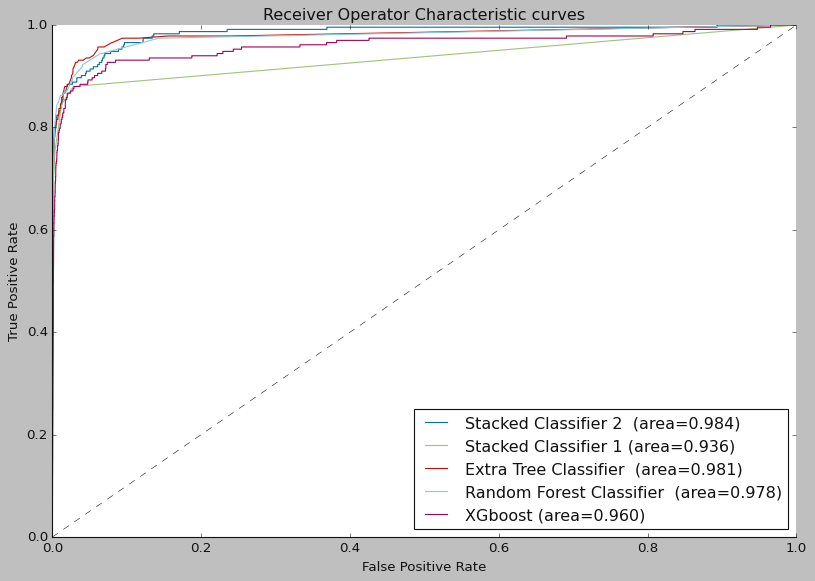

In [121]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,clf.predict_proba(X_test),label='Stacked Classifier 2 ',l='-')
roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier 1',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
#roc_auc_plot(y_test,decc.predict_proba(X_test),label='CART Classifier ',l='-')
#roc_auc_plot(y_test,svc.predict_proba(X_test),label='SVM Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

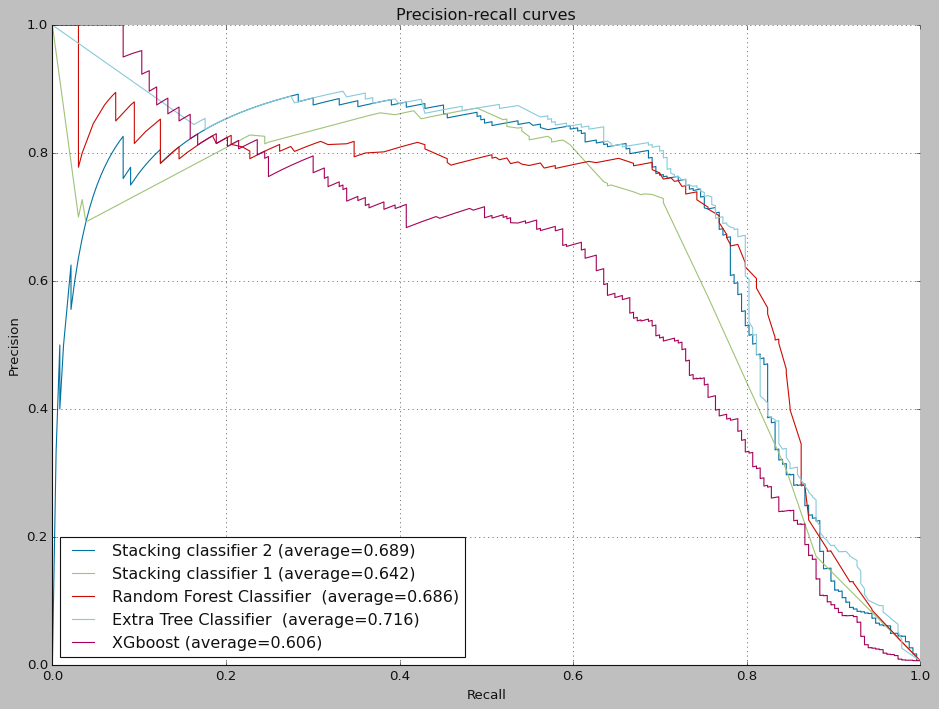

In [122]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,clf.predict_proba(X_test),label='Stacking classifier 2',l='-')
precision_recall_plot(y_test,model.predict_proba(S_test),label='Stacking classifier 1',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
#precision_recall_plot(y_test,decc.predict_proba(X_test),label='CART Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

In [185]:
feature_details

,컬럼명,항목명(국문)
0,J_F1_LON_RK_3M_CNT_RE,최근 3개월 제1금융권 여신거래 기관 수
1,J_F1_OTHER_LON_6M_AVBL_AM_RE,최근 6개월 타행(제1금융권) 여신 금액 평균
2,J_F1_OTHER_LON_MAX_3M_AM_RE,최근 3개월간 전체 타행(제1금융권) 여신 금액 최대값
3,J_SHINBO_GIBO_AM_RE,"현재 보유 신용보증기금, 기술보증기금 여신 금액"
4,J_TOT_LON_CNT_RE,여신 계좌 수
...,...,...
90,J_SIC_CD_5_RE_2,"표준 산업분류 (도매 및 소매업, 숙박 및 음식점업, 부동산업 및 임대업)"
91,J_SKIL_GDCD_RE_1,기술등급 없음
92,J_SKIL_GDCD_RE_2,기술등급있음
93,J_MAIN_LON_BANK_CD_RE_1,"주 채권 은행_우리은행, 국민은행, 기업은행, 농협은행, 기타"


In [187]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("TARGET")

dot_data = StringIO()
export_graphviz(decc, out_file=dot_data, feature_names=feature_details['항목명(국문)'], filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



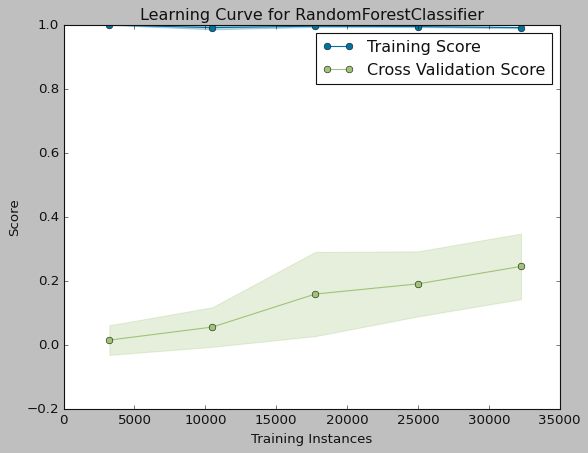

In [188]:
from yellowbrick.model_selection import learning_curve

learning_curve(model, X_test, y_test, cv=10, scoring='f1')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/mod

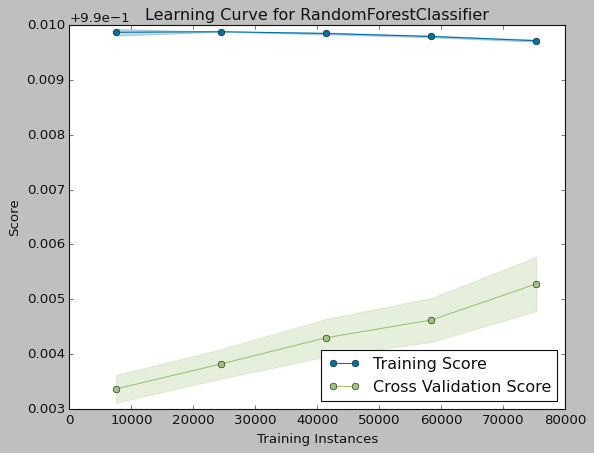

AxesSubplot(0.125,0.1;0.775x0.8)


In [189]:
from yellowbrick.model_selection import learning_curve

print(learning_curve(model, X_train, y_train, cv=10, scoring='accuracy'))

Save Model

In [190]:
import pickle
file_1 = "stack1.pkl"
file_2 = "stack2.pkl"
# save
pickle.dump(model, open(file_1, "wb"))
pickle.dump(clf, open(file_2, "wb"))

# Feature Importance

In [181]:
xgb_feature = xgb.fit(X_train,y_train).feature_importances_
decc_feature = decc.fit(X_train,y_train).feature_importances_
et_500_feature = et_500.fit(X_train,y_train).feature_importances_
rf_ent_feature = rf_ent.fit(X_train,y_train).feature_importances_
ada_feature = ada.fit(X_train,y_train).feature_importances_

p = pd.DataFrame(X.iloc[0]).reset_index()
p.columns = ['컬럼명', 'index']
p = p.drop(['index'], axis=1)
feature_details = p.merge(details[['컬럼명', '항목명(국문)']], on='컬럼명')
feature_details

cols = X.columns.values
col_detail = np.array(feature_details['항목명(국문)']) # replace column names with details
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': col_detail,
     'Random Forest feature importances': rf_ent_feature,
     'Extra Trees  feature importances': et_500_feature,
      'CART feature importances': decc_feature,
    'Gradient Boost feature importances': xgb_feature,
    'AdaBoost feature importances': ada_feature,
    })

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarn

In [193]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost feature importances',
    hovermode= 'closest',
    xaxis= dict(tickfont = dict(size=8)),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
    xaxis= dict(tickfont = dict(size=8)),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
    xaxis= dict(tickfont = dict(size=8)),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['CART feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['CART feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'CART feature importances',
    hovermode= 'closest',
    xaxis= dict(tickfont = dict(size=8)),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
    xaxis= dict(tickfont = dict(size=8)),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')



In [183]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    xaxis= dict(tickfont = dict(size=8)),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')


References

https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101

https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

https://machinelearningmastery.com/essence-of-stacking-ensembles-for-machine-learning/

https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/

https://www.kaggle.com/sid321axn/stacked-ensemble-for-heart-disease-classification

https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

https://www.kaggle.com/prashant111/stacked-classifier-top-10-on-lb

https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b